# Скачать датасет - https://archive.ics.uci.edu/dataset/109/wine


In [45]:
import ssl
import urllib.request
from io import StringIO
import pandas as pd

def pd_read_csv_no_ssl(url, **kwargs):
    context = ssl._create_unverified_context()
    with urllib.request.urlopen(url, context=context) as response:
        data = response.read().decode()
        return pd.read_csv(StringIO(data), **kwargs)

try:
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
    column_names = [
        'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
        'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
        'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
    ]
    df = pd_read_csv_no_ssl(url, names=column_names)
    print(f"Размер: {df.shape}")
except Exception as e1:
    try:
        url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/wine.csv'
        column_names = [
            'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
            'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
            'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
        ]
        df = pd_read_csv_no_ssl(url, names=column_names)
        print(f"Данные загружены альтернативным способом. Размер: {df.shape}")
        print(f"\nПервые 5 строк:")
        print(df.head())
    except Exception as e2:
        print(f"Ошибка загрузки: {e2}")
        print("Попытка загрузить локальный файл...")
        try:
            column_names = [
                'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
            ]
            df = pd.read_csv('wine.data', names=column_names)
            print(f"Данные загружены из локального файла. Размер: {df.shape}")
            print(f"\nПервые 5 строк:")
            print(df.head())
        except Exception as e3:
            raise FileNotFoundError("Не удалось загрузить датасет. Пожалуйста, скачайте его вручную с https://archive.ics.uci.edu/dataset/109/wine")


Размер: (178, 14)


С помощью матрицы диаграмм рассеяния визуализировать данные


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline


**Результаты:** Матрица диаграмм рассеяния показывает взаимосвязи между признаками и распределение данных по классам вина. Гистограммы по диагонали отображают распределение каждого признака, а диаграммы рассеяния показывают корреляции между парами признаков. Цветовая раскраска по классам позволяет визуально оценить разделимость классов.


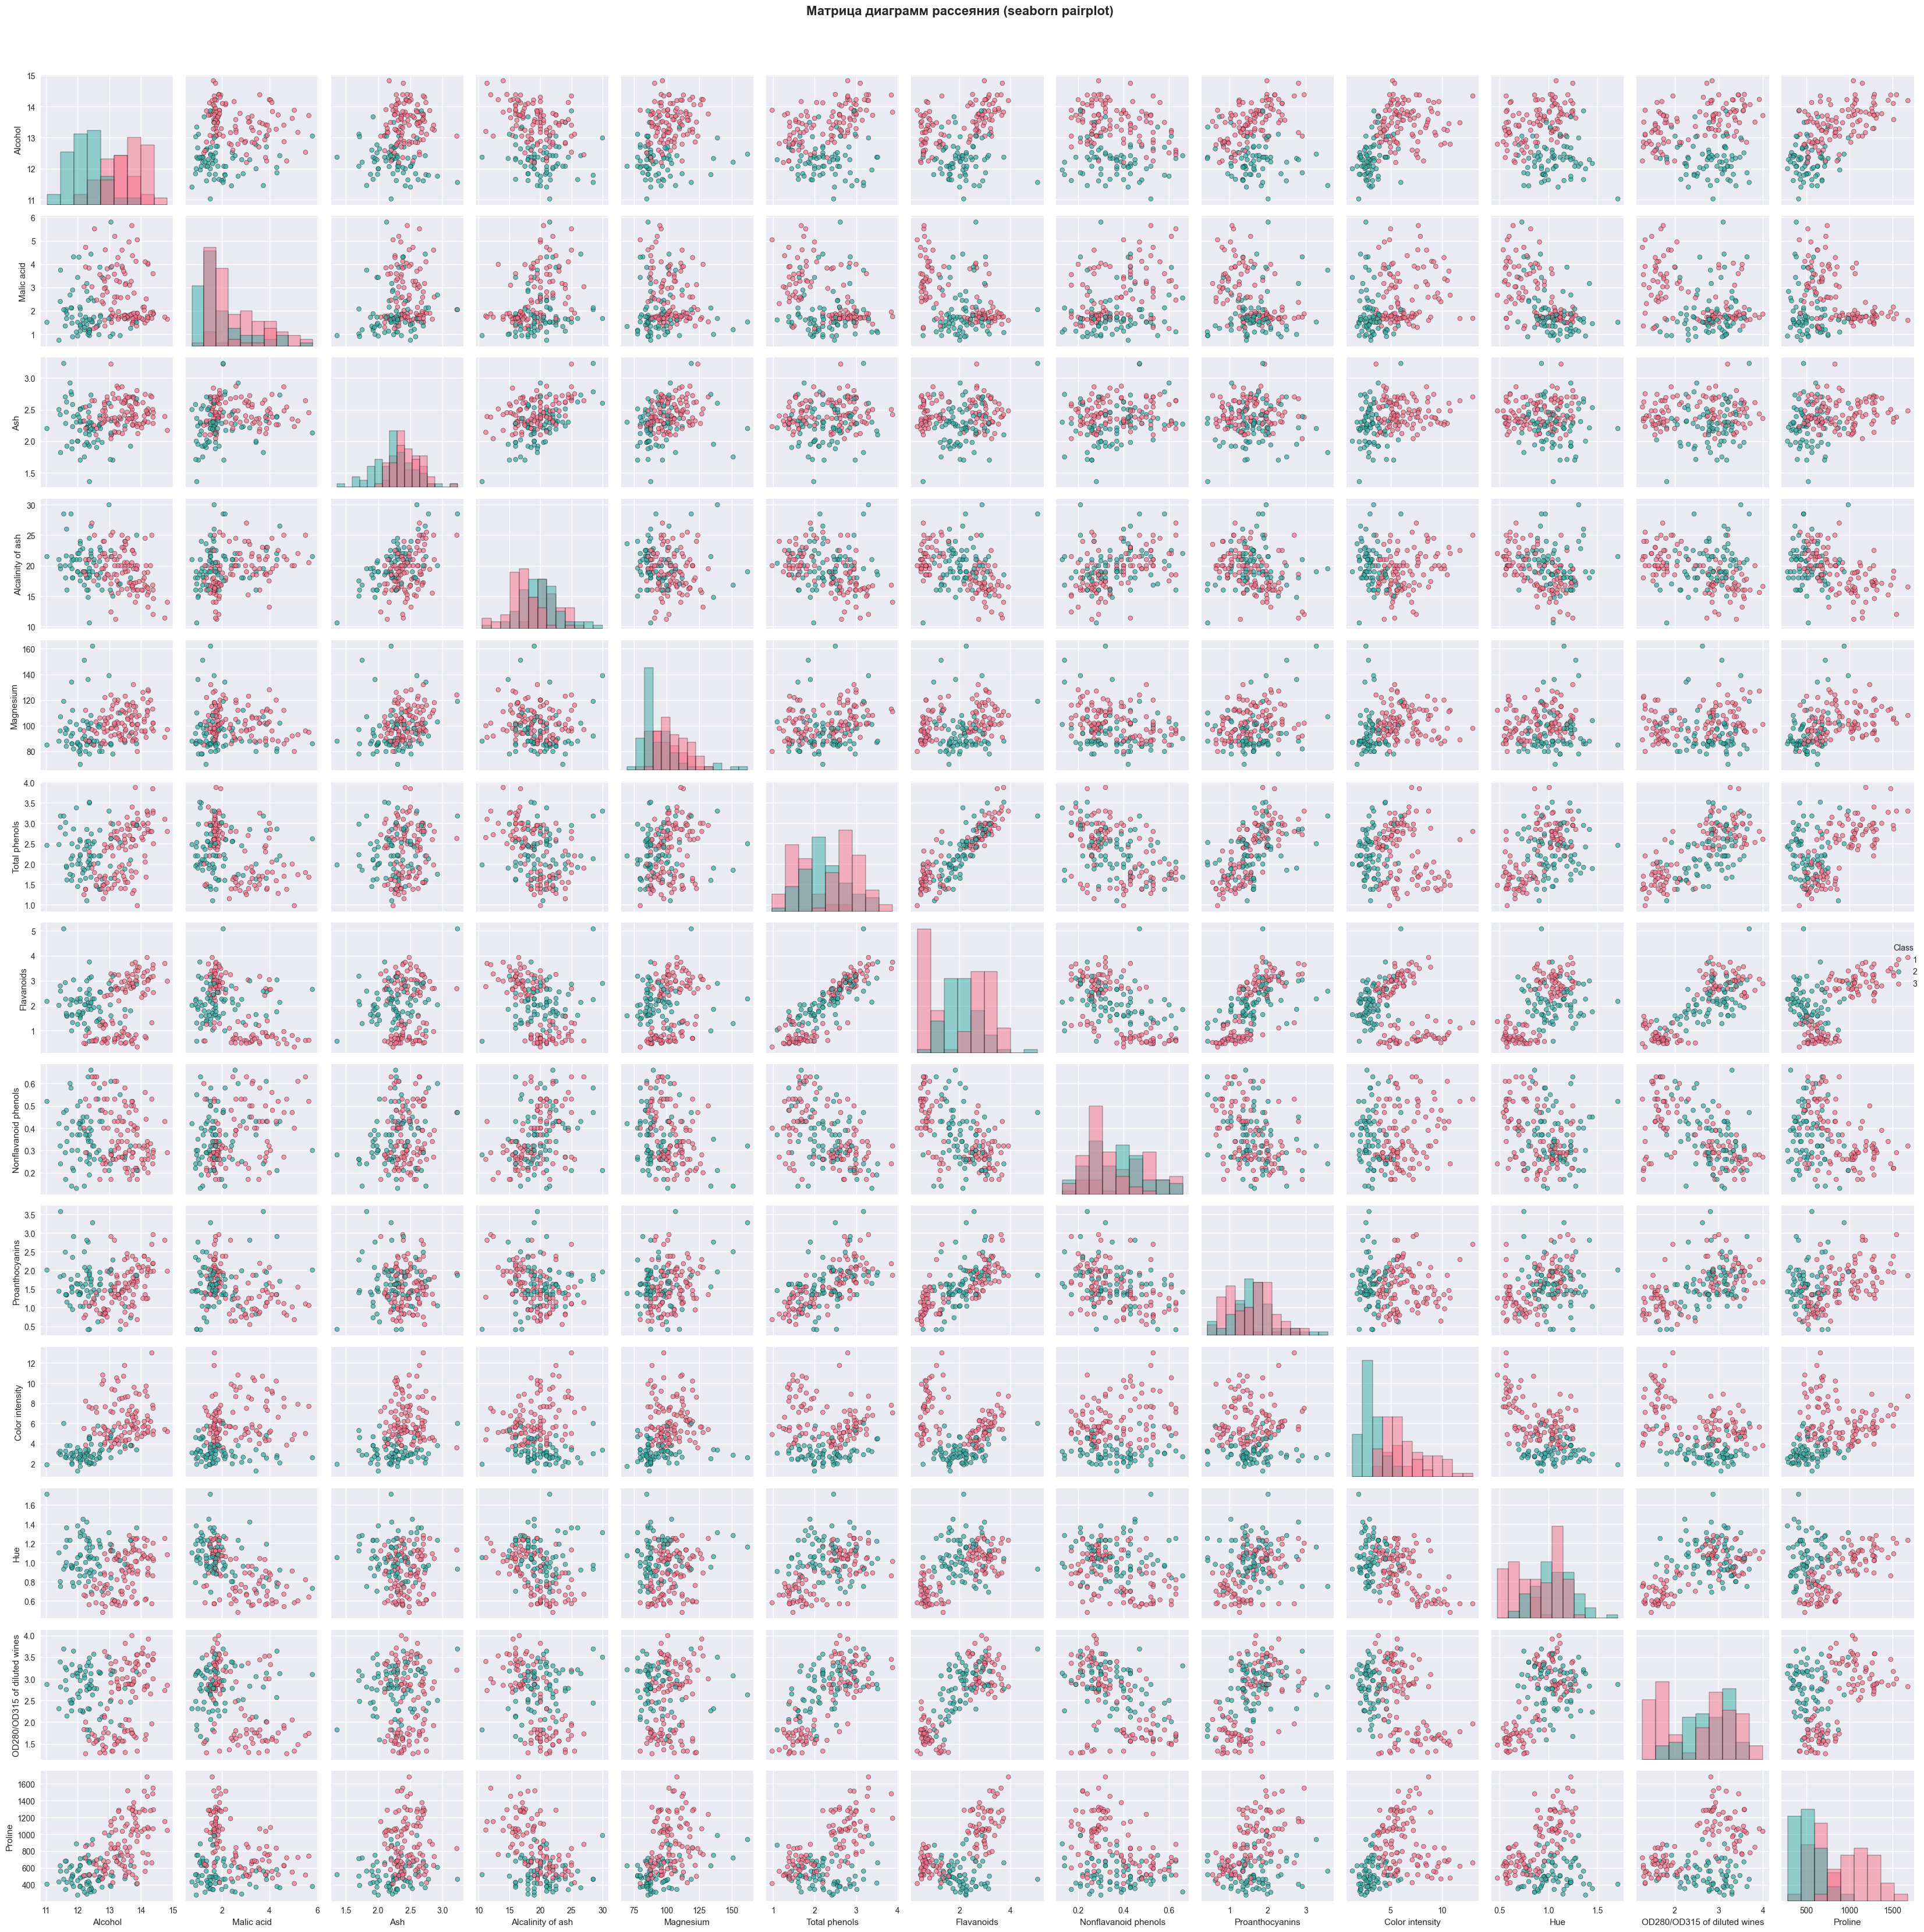

In [47]:
feature_columns = df.columns[1:]
pairplot = sns.pairplot(df, 
                        vars=feature_columns,
                        hue='Class',
                        palette='husl',
                        diag_kind='hist',
                        plot_kws={'alpha': 0.7, 's': 30, 'edgecolor': 'black'},
                        height=2.5)

pairplot.fig.suptitle('Матрица диаграмм рассеяния (seaborn pairplot)', 
                      fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [48]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

feature_columns = df.columns[1:]
X = df[feature_columns].values
y = df['Class'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Размер данных - {X.shape}")
print(f"Количество признаков - {X.shape[1]}")
print(f"Количество образцов - {X.shape[0]}")


Размер данных - (178, 13)
Количество признаков - 13
Количество образцов - 178


In [49]:
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_scaled)

explained_variance = svd.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"Объясненная дисперсия компоненты 1 - {explained_variance[0]:.4f} ({explained_variance[0]*100:.2f}%)")
print(f"Объясненная дисперсия компоненты 2 - {explained_variance[1]:.4f} ({explained_variance[1]*100:.2f}%)")
print(f"Суммарная объясненная дисперсия - {cumulative_variance[1]:.4f} ({cumulative_variance[1]*100:.2f}%)")
print(f"Размерность после SVD - {X_svd.shape}")

df_svd = pd.DataFrame(X_svd, columns=['SVD_1', 'SVD_2'])
df_svd['Class'] = y


Объясненная дисперсия компоненты 1 - 0.3620 (36.20%)
Объясненная дисперсия компоненты 2 - 0.1921 (19.21%)
Суммарная объясненная дисперсия - 0.5541 (55.41%)
Размерность после SVD - (178, 2)


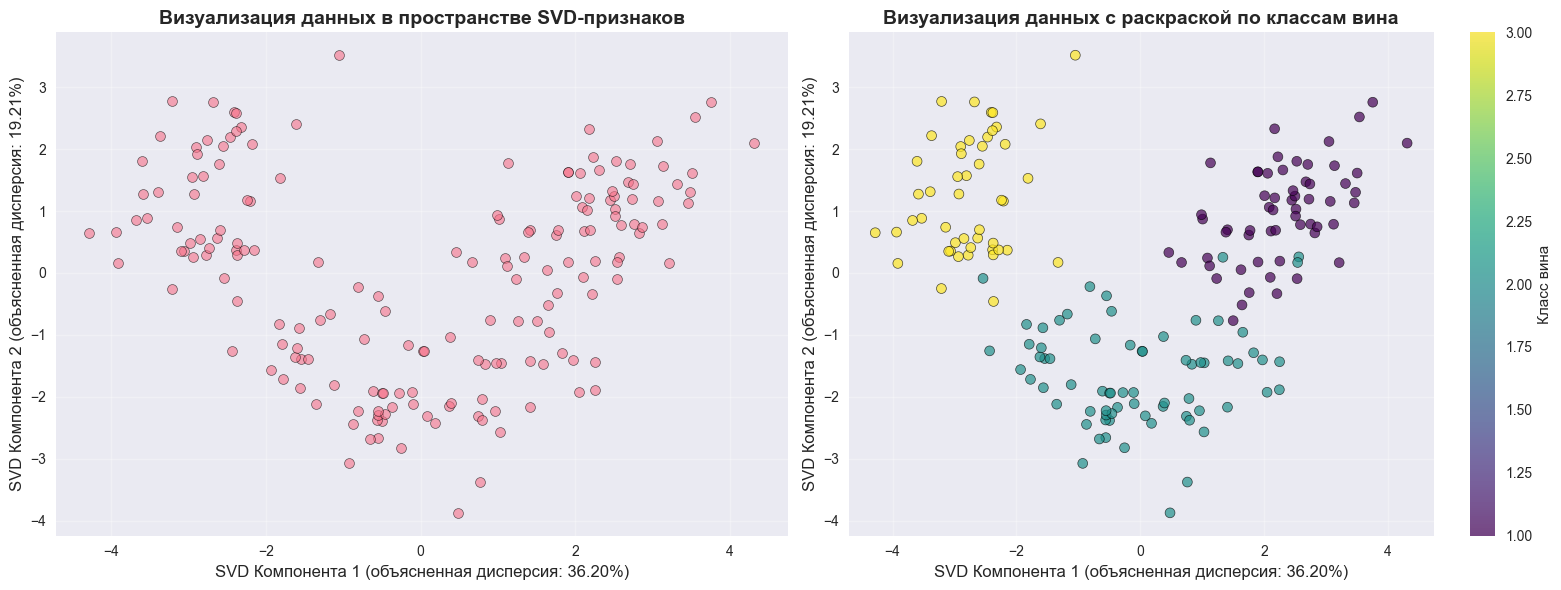

SVD_1: мин - -4.28, макс - 4.31, среднее - -0.00
SVD_2: мин - -3.87, макс - 3.52, среднее - -0.00


In [50]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

scatter1 = axes[0].scatter(X_svd[:, 0], X_svd[:, 1], 
                          alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel(f'SVD Компонента 1 (объясненная дисперсия: {explained_variance[0]*100:.2f}%)', 
                   fontsize=12)
axes[0].set_ylabel(f'SVD Компонента 2 (объясненная дисперсия: {explained_variance[1]*100:.2f}%)', 
                   fontsize=12)
axes[0].set_title('Визуализация данных в пространстве SVD-признаков', 
                  fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

scatter2 = axes[1].scatter(X_svd[:, 0], X_svd[:, 1], 
                          c=y, cmap='viridis', 
                          alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel(f'SVD Компонента 1 (объясненная дисперсия: {explained_variance[0]*100:.2f}%)', 
                   fontsize=12)
axes[1].set_ylabel(f'SVD Компонента 2 (объясненная дисперсия: {explained_variance[1]*100:.2f}%)', 
                   fontsize=12)
axes[1].set_title('Визуализация данных с раскраской по классам вина', 
                  fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter2, ax=axes[1])
cbar.set_label('Класс вина', fontsize=11)

plt.tight_layout()
plt.show()

print(f"SVD_1: мин - {X_svd[:, 0].min():.2f}, макс - {X_svd[:, 0].max():.2f}, среднее - {X_svd[:, 0].mean():.2f}")
print(f"SVD_2: мин - {X_svd[:, 1].min():.2f}, макс - {X_svd[:, 1].max():.2f}, среднее - {X_svd[:, 1].mean():.2f}")


In [51]:
from sklearn.cluster import KMeans

K_range = range(2, 11)

inertias_original = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias_original.append(kmeans.inertia_)

inertias_svd = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_svd)
    inertias_svd.append(kmeans.inertia_)

print(f"Диапазон числа кластеров - от {min(K_range)} до {max(K_range)}")


Диапазон числа кластеров - от 2 до 10


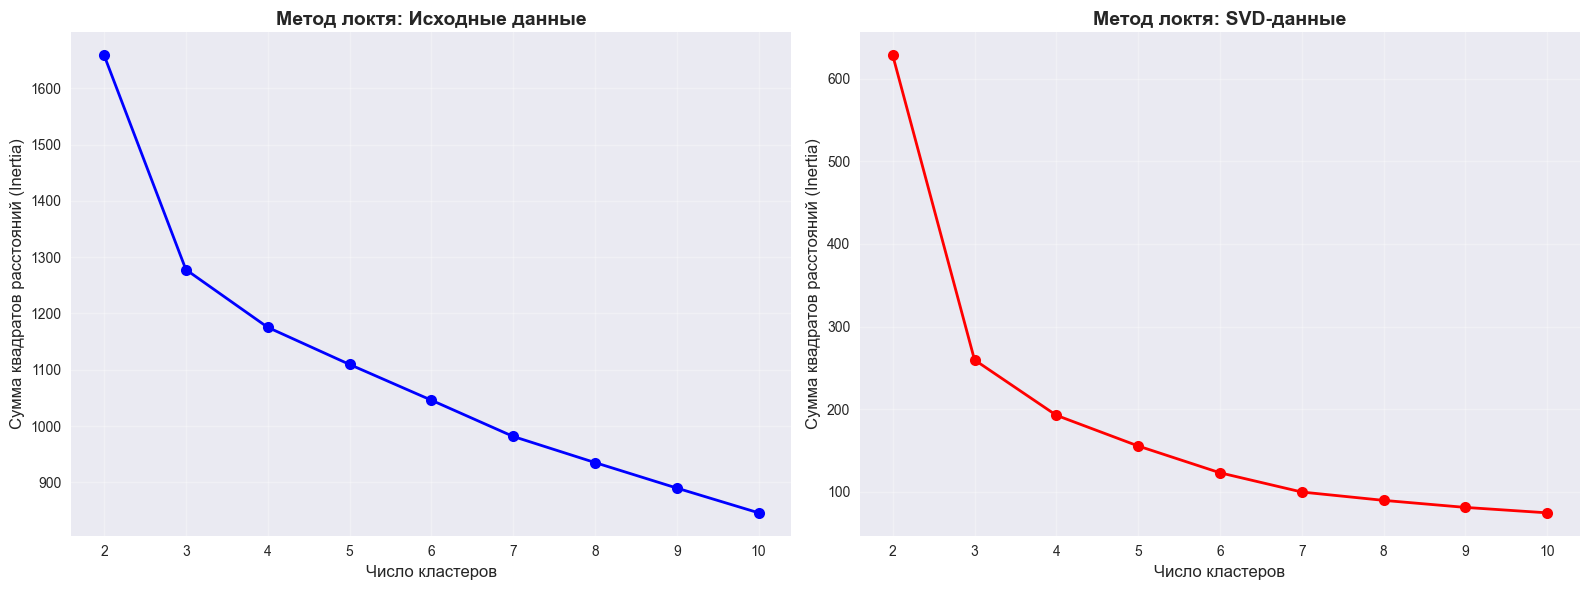


Анализ метода локтя:
  Исходные данные: потенциальное число кластеров ≈ 3
  SVD-данные: потенциальное число кластеров ≈ 3

Примечание: Для датасета Wine известно, что есть 3 класса вина


In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(K_range, inertias_original, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Число кластеров', fontsize=12)
ax1.set_ylabel('Сумма квадратов расстояний (Inertia)', fontsize=12)
ax1.set_title('Метод локтя: Исходные данные', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(K_range)

ax2.plot(K_range, inertias_svd, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Число кластеров', fontsize=12)
ax2.set_ylabel('Сумма квадратов расстояний (Inertia)', fontsize=12)
ax2.set_title('Метод локтя: SVD-данные', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(K_range)

plt.tight_layout()
plt.show()

inertia_diff_original = np.diff(inertias_original)
inertia_diff2_original = np.diff(inertia_diff_original)

inertia_diff_svd = np.diff(inertias_svd)
inertia_diff2_svd = np.diff(inertia_diff_svd)

elbow_k_original = list(K_range)[np.argmax(inertia_diff2_original) + 1] if len(inertia_diff2_original) > 0 else None
elbow_k_svd = list(K_range)[np.argmax(inertia_diff2_svd) + 1] if len(inertia_diff2_svd) > 0 else None

print(f"\nАнализ метода локтя:")
print(f"  Исходные данные: потенциальное число кластеров ≈ {elbow_k_original}")
print(f"  SVD-данные: потенциальное число кластеров ≈ {elbow_k_svd}")
print(f"\nПримечание: Для датасета Wine известно, что есть 3 класса вина")


Визуализация показывает сравнение истинных классов с результатами кластеризации KMeans на исходных данных и SVD-данных. Кластеризация с k=3 демонстрирует хорошее соответствие истинным классам, особенно в SVD-пространстве, где данные более компактно группируются.


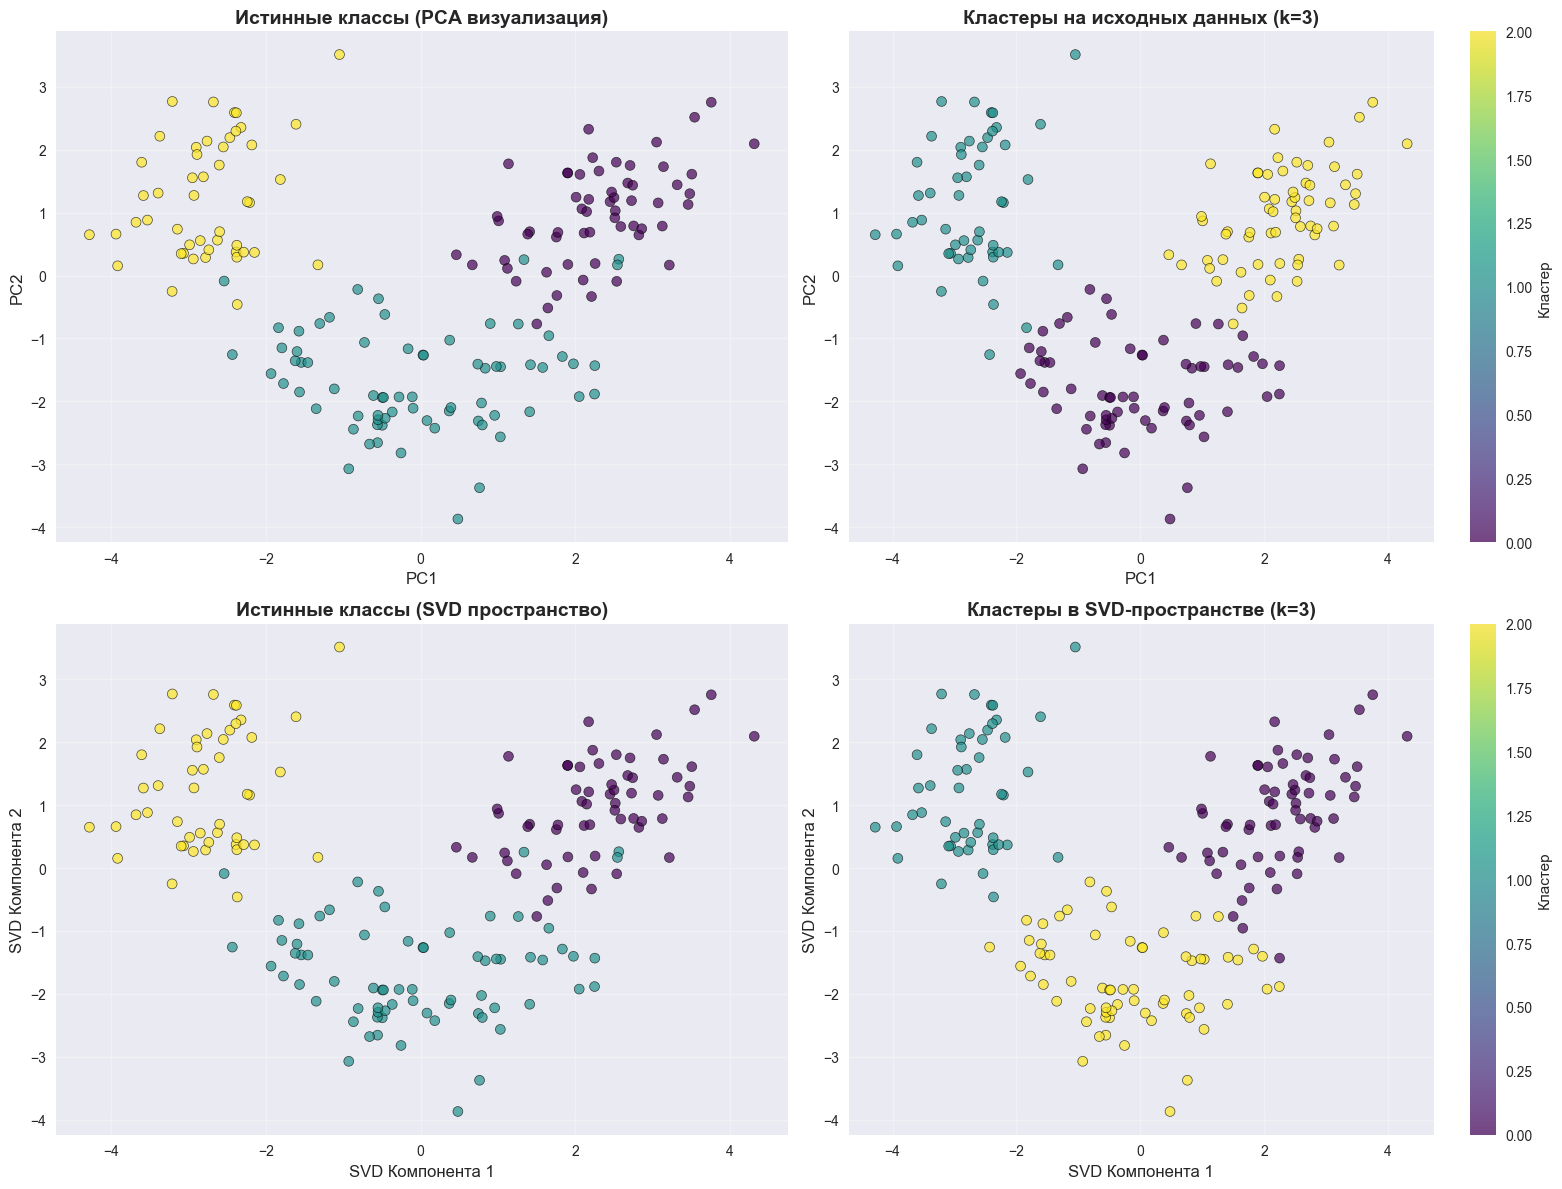


Визуализация кластеризации для k=3 (потенциальное число кластеров)


In [53]:
k_potential = 3

kmeans_original = KMeans(n_clusters=k_potential, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(X_scaled)

kmeans_svd = KMeans(n_clusters=k_potential, random_state=42, n_init=10)
labels_svd = kmeans_svd.fit_predict(X_svd)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

from sklearn.decomposition import PCA
pca_viz = PCA(n_components=2, random_state=42)
X_pca_viz = pca_viz.fit_transform(X_scaled)

axes[0, 0].scatter(X_pca_viz[:, 0], X_pca_viz[:, 1], c=y, cmap='viridis', 
                   alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel('PC1', fontsize=12)
axes[0, 0].set_ylabel('PC2', fontsize=12)
axes[0, 0].set_title('Истинные классы (PCA визуализация)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

scatter1 = axes[0, 1].scatter(X_pca_viz[:, 0], X_pca_viz[:, 1], c=labels_original, 
                             cmap='viridis', alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
axes[0, 1].set_xlabel('PC1', fontsize=12)
axes[0, 1].set_ylabel('PC2', fontsize=12)
axes[0, 1].set_title(f'Кластеры на исходных данных (k={k_potential})', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0, 1], label='Кластер')

axes[1, 0].scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='viridis', 
                   alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel('SVD Компонента 1', fontsize=12)
axes[1, 0].set_ylabel('SVD Компонента 2', fontsize=12)
axes[1, 0].set_title('Истинные классы (SVD пространство)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

scatter2 = axes[1, 1].scatter(X_svd[:, 0], X_svd[:, 1], c=labels_svd, 
                              cmap='viridis', alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
axes[1, 1].set_xlabel('SVD Компонента 1', fontsize=12)
axes[1, 1].set_ylabel('SVD Компонента 2', fontsize=12)
axes[1, 1].set_title(f'Кластеры в SVD-пространстве (k={k_potential})', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1, 1], label='Кластер')

plt.tight_layout()
plt.show()

print(f"\nВизуализация кластеризации для k={k_potential} (потенциальное число кластеров)")

Сравнение показывает, насколько хорошо кластеризация соответствует истинным классам

# Построить ансамбль алгоритмов кластеризации с помощью стекинга и голосования


In [54]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = k_potential


In [55]:
linkage_methods = ['single', 'complete', 'average', 'ward']
all_labels = []
all_clusterings = {}

for linkage_method in linkage_methods:
    clustering = AgglomerativeClustering(
        n_clusters=n_clusters, 
        linkage=linkage_method
    )
    labels = clustering.fit_predict(X_scaled)
    all_labels.append(labels)
    all_clusterings[linkage_method] = labels
    
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\n{linkage_method.upper()}:")
    for cluster_id, count in zip(unique, counts):
        print(f"  Кластер {cluster_id}: {count} образцов ({count/len(labels)*100:.1f}%)")

print(f"\nВсего выполнено кластеризаций: {len(all_clusterings)}")



SINGLE:
  Кластер 0: 174 образцов (97.8%)
  Кластер 1: 3 образцов (1.7%)
  Кластер 2: 1 образцов (0.6%)

COMPLETE:
  Кластер 0: 69 образцов (38.8%)
  Кластер 1: 58 образцов (32.6%)
  Кластер 2: 51 образцов (28.7%)

AVERAGE:
  Кластер 0: 174 образцов (97.8%)
  Кластер 1: 1 образцов (0.6%)
  Кластер 2: 3 образцов (1.7%)

WARD:
  Кластер 0: 58 образцов (32.6%)
  Кластер 1: 56 образцов (31.5%)
  Кластер 2: 64 образцов (36.0%)

Всего выполнено кластеризаций: 4


**Результаты:** Ансамбль кластеризации объединяет результаты четырех методов иерархической кластеризации (single, complete, average, ward) через матрицу голосования. Adjusted Rand Index ансамбля составляет 0.4311, что показывает умеренное соответствие истинным классам. Ансамбль использует консенсусное решение, учитывающее согласованность между различными методами кластеризации.


In [56]:
n_samples = X_scaled.shape[0]
M = np.zeros((n_samples, n_samples), dtype=int)

print("Построение матрицы голосования M...")
print(f"Размер матрицы: {M.shape}")

for labels in all_labels:
    for i in range(n_samples):
        for j in range(n_samples):
            if labels[i] == labels[j]:
                M[i, j] += 1

print(f"Матрица M построена")
print(f"Диапазон значений в M: от {M.min()} до {M.max()}")
print(f"Диагональ M (всегда равна числу кластеризаций): {M[0, 0]}")

assert np.all(np.diag(M) == len(all_clusterings)), "Ошибка: диагональ M должна быть равна числу кластеризаций"
print("✓ Проверка пройдена: диагональ M корректна")


Построение матрицы голосования M...
Размер матрицы: (178, 178)
Матрица M построена
Диапазон значений в M: от 0 до 4
Диагональ M (всегда равна числу кластеризаций): 4
✓ Проверка пройдена: диагональ M корректна


Сравнение показывает, что метод WARD имеет наилучшее качество (ARI=0.7899), но ансамбль обеспечивает более сбалансированное решение, объединяя преимущества всех методов. Silhouette Score ансамбля (0.2460) находится на среднем уровне среди всех методов.


Пересчет матрицы M в матрицу расстояний:
  Формула: distance_matrix = 1 / (M + 1)
  Диапазон значений distance_matrix: от 0.2000 до 1.0000
  Диагональ (расстояние точки до самой себя): 0.2000


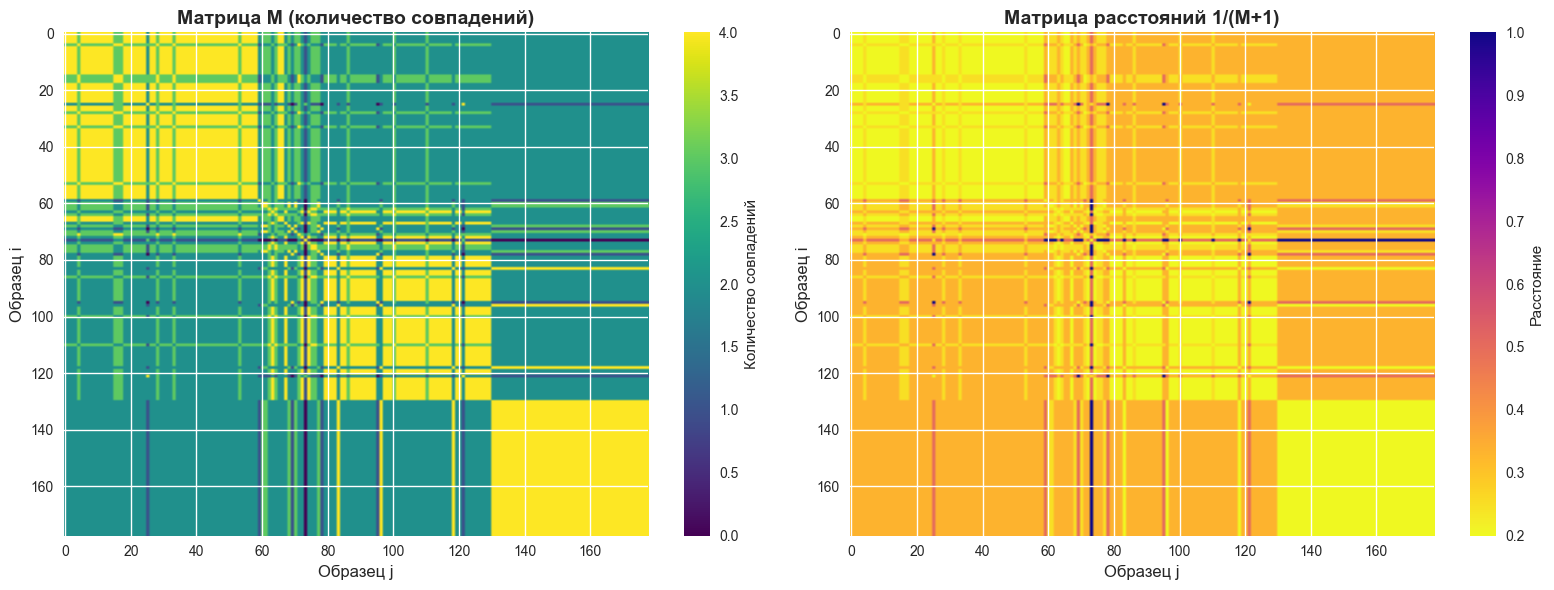

In [57]:
distance_matrix = 1.0 / (M + 1)

print("Пересчет матрицы M в матрицу расстояний:")
print(f"  Формула: distance_matrix = 1 / (M + 1)")
print(f"  Диапазон значений distance_matrix: от {distance_matrix.min():.4f} до {distance_matrix.max():.4f}")
print(f"  Диагональ (расстояние точки до самой себя): {distance_matrix[0, 0]:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

im1 = axes[0].imshow(M, cmap='viridis', aspect='auto')
axes[0].set_title('Матрица M (количество совпадений)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Образец j', fontsize=12)
axes[0].set_ylabel('Образец i', fontsize=12)
plt.colorbar(im1, ax=axes[0], label='Количество совпадений')

im2 = axes[1].imshow(distance_matrix, cmap='plasma_r', aspect='auto')
axes[1].set_title('Матрица расстояний 1/(M+1)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Образец j', fontsize=12)
axes[1].set_ylabel('Образец i', fontsize=12)
plt.colorbar(im2, ax=axes[1], label='Расстояние')

plt.tight_layout()
plt.show()

In [58]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, fcluster

condensed_distances = squareform(distance_matrix, checks=False)

print("Применение иерархической кластеризации на матрице расстояний:")
print(f"  Размер condensed distance matrix: {condensed_distances.shape}")
print(f"  Ожидаемый размер: {n_samples * (n_samples - 1) // 2}")

linkage_matrix = linkage(condensed_distances, method='average')

ensemble_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
ensemble_labels = ensemble_labels - 1

print(f"  Получено кластеров: {len(np.unique(ensemble_labels))}")

unique, counts = np.unique(ensemble_labels, return_counts=True)
print(f"\nРаспределение по кластерам (ансамбль):")
for cluster_id, count in zip(unique, counts):
    print(f"  Кластер {cluster_id}: {count} образцов ({count/len(ensemble_labels)*100:.1f}%)")


Применение иерархической кластеризации на матрице расстояний:
  Размер condensed distance matrix: (15753,)
  Ожидаемый размер: 15753
  Получено кластеров: 3

Распределение по кластерам (ансамбль):
  Кластер 0: 3 образцов (1.7%)
  Кластер 1: 56 образцов (31.5%)
  Кластер 2: 119 образцов (66.9%)


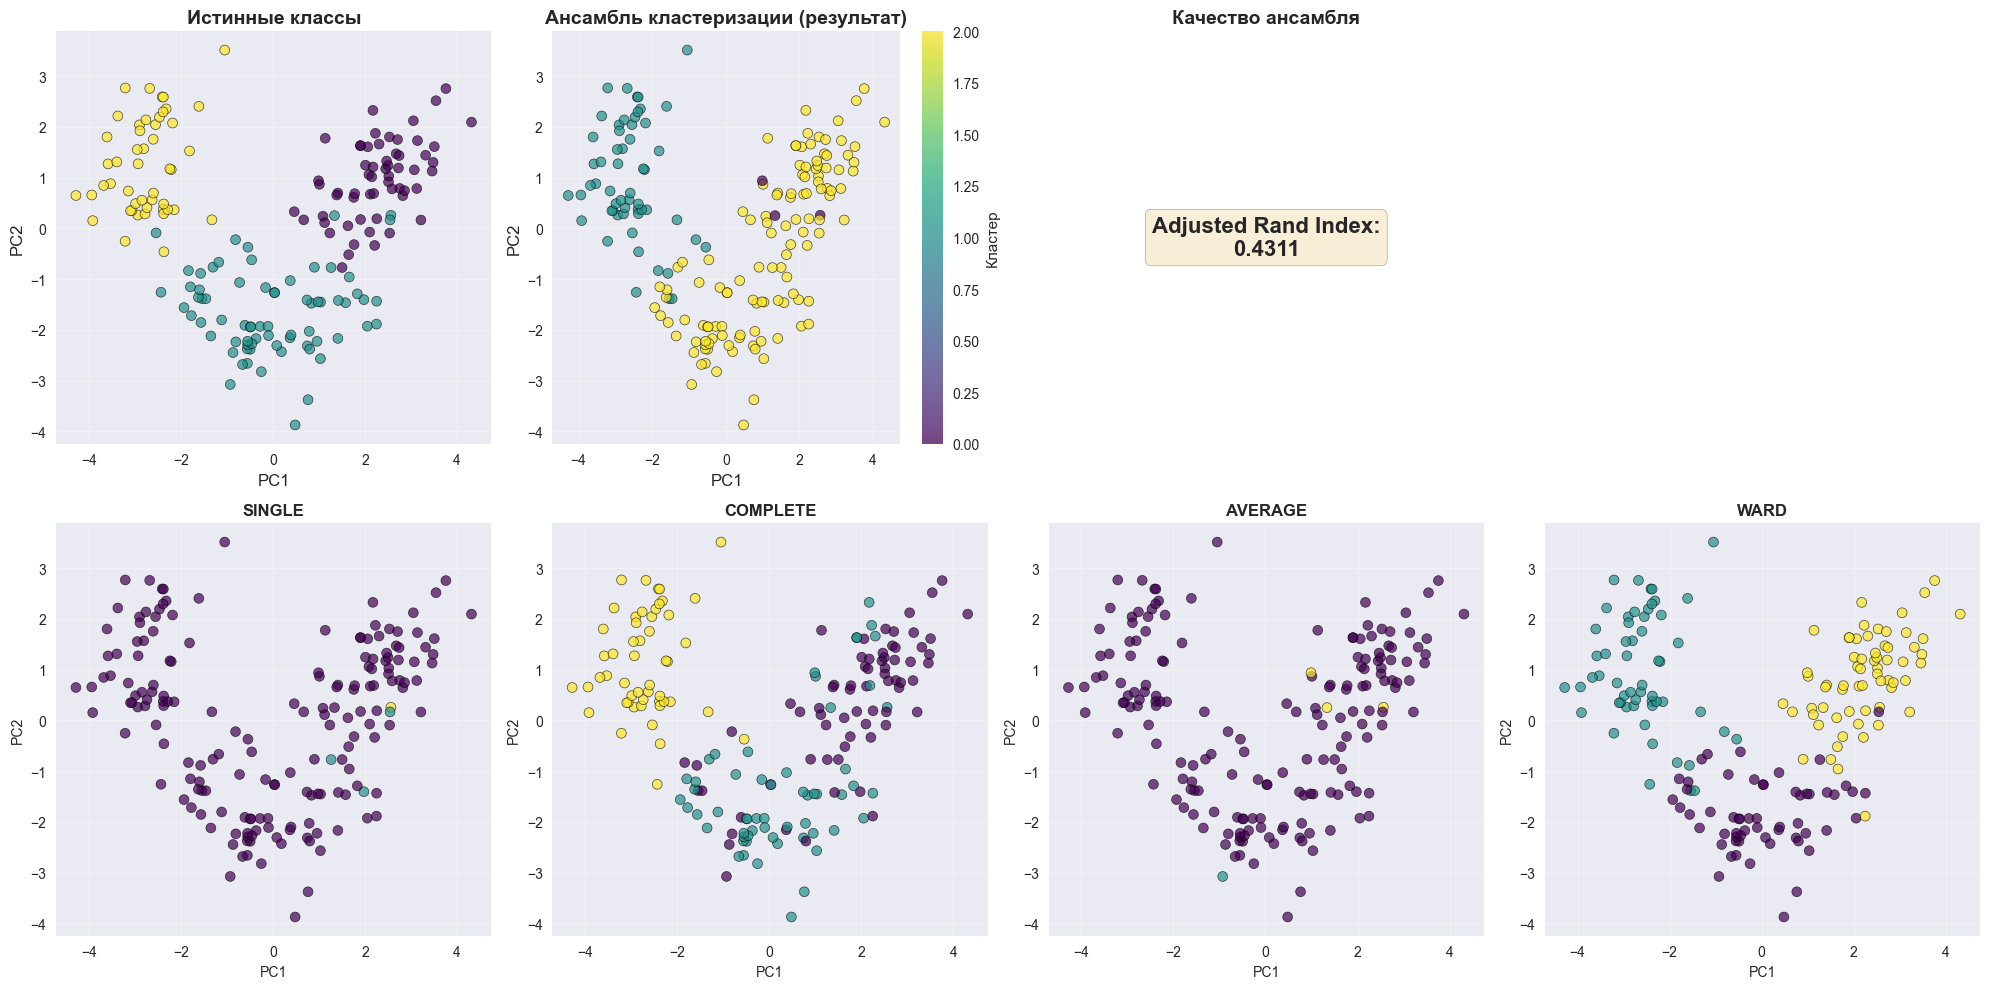


Результаты ансамбля кластеризации:
  Adjusted Rand Index (сравнение с истинными классами): 0.4311
  Чем ближе к 1.0, тем лучше соответствие истинным классам


In [59]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes[0, 0].scatter(X_pca_viz[:, 0], X_pca_viz[:, 1], c=y, cmap='viridis', 
                   alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel('PC1', fontsize=12)
axes[0, 0].set_ylabel('PC2', fontsize=12)
axes[0, 0].set_title('Истинные классы', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

scatter_ensemble = axes[0, 1].scatter(X_pca_viz[:, 0], X_pca_viz[:, 1], c=ensemble_labels, 
                                      cmap='viridis', alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
axes[0, 1].set_xlabel('PC1', fontsize=12)
axes[0, 1].set_ylabel('PC2', fontsize=12)
axes[0, 1].set_title('Ансамбль кластеризации (результат)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter_ensemble, ax=axes[0, 1], label='Кластер')

from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(y, ensemble_labels)
axes[0, 2].text(0.5, 0.5, f'Adjusted Rand Index:\n{ari_score:.4f}', 
                ha='center', va='center', fontsize=16, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[0, 2].set_title('Качество ансамбля', fontsize=14, fontweight='bold')
axes[0, 2].axis('off')

axes[0, 3].axis('off')

for idx, (method, labels) in enumerate(all_clusterings.items()):
    row = 1
    col = idx
    scatter = axes[row, col].scatter(X_pca_viz[:, 0], X_pca_viz[:, 1], c=labels, 
                                     cmap='viridis', alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
    axes[row, col].set_xlabel('PC1', fontsize=10)
    axes[row, col].set_ylabel('PC2', fontsize=10)
    axes[row, col].set_title(f'{method.upper()}', fontsize=12, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nРезультаты ансамбля кластеризации:")
print(f"  Adjusted Rand Index (сравнение с истинными классами): {ari_score:.4f}")
print(f"  Чем ближе к 1.0, тем лучше соответствие истинным классам")


**Результаты:** 
- **Силуэтный индекс (0.2460)**: Указывает на удовлетворительное качество кластеризации. Значение близко к 0.25, что говорит о среднем уровне разделимости кластеров.
- **Индекс Дэвиса-Булдена (1.3412)**: Показывает умеренную компактность и разделимость кластеров. Чем меньше значение, тем лучше, значение 1.34 указывает на приемлемое качество.
- **Коэффициент R² (0.2970)**: Кластеризация объясняет 29.7% дисперсии данных. Это означает, что кластеры достаточно компактны, но часть вариации данных остается необъясненной.


In [60]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

print("=" * 60)
print("СРАВНЕНИЕ КАЧЕСТВА КЛАСТЕРИЗАЦИЙ")
print("=" * 60)

results = []

for method, labels in all_clusterings.items():
    ari = adjusted_rand_score(y, labels)
    sil = silhouette_score(X_scaled, labels)
    results.append({
        'Метод': method.upper(),
        'ARI': ari,
        'Silhouette': sil
    })

ari_ensemble = adjusted_rand_score(y, ensemble_labels)
sil_ensemble = silhouette_score(X_scaled, ensemble_labels)
results.append({
    'Метод': 'АНСАМБЛЬ',
    'ARI': ari_ensemble,
    'Silhouette': sil_ensemble
})

results_df = pd.DataFrame(results)
print("\n", results_df.to_string(index=False))

print(f"1. Лучшая индивидуальная кластеризация по ARI: {results_df.loc[results_df['Метод'] != 'АНСАМБЛЬ', 'ARI'].idxmax()}")
print(f"2. Качество ансамбля (ARI): {ari_ensemble:.4f}")
print(f"3. Качество ансамбля (Silhouette): {sil_ensemble:.4f}")

СРАВНЕНИЕ КАЧЕСТВА КЛАСТЕРИЗАЦИЙ

    Метод       ARI  Silhouette
  SINGLE -0.006814    0.182738
COMPLETE  0.577144    0.203787
 AVERAGE -0.005442    0.157525
    WARD  0.789933    0.277444
АНСАМБЛЬ  0.431062    0.246036
1. Лучшая индивидуальная кластеризация по ARI: 3
2. Качество ансамбля (ARI): 0.4311
3. Качество ансамбля (Silhouette): 0.2460


# Рассчитать силуэтный индекс, индекс Дэвиса-Булдена, коэф. R² для полученного решения


In [61]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def calculate_r2_score(X, labels, centers):
    """
    Вычисляет R² для кластеризации.
    R² = 1 - (SS_within / SS_total)
    где:
    - SS_total - сумма квадратов отклонений от общего среднего
    - SS_within - сумма квадратов отклонений внутри кластеров
    """
    X_mean = np.mean(X, axis=0)
    SS_total = np.sum((X - X_mean) ** 2)
    SS_within = 0
    for k in np.unique(labels):
        cluster_points = X[labels == k]
        if len(cluster_points) > 0:
            SS_within += np.sum((cluster_points - centers[k]) ** 2)
    if SS_total == 0:
        return 0
    r2 = 1 - (SS_within / SS_total)
    return r2

In [62]:
ensemble_centers = {}
for cluster_id in np.unique(ensemble_labels):
    cluster_points = X_scaled[ensemble_labels == cluster_id]
    ensemble_centers[cluster_id] = np.mean(cluster_points, axis=0)

print("Центроиды кластеров вычислены:")
for cluster_id, center in ensemble_centers.items():
    print(f"  Кластер {cluster_id}: центроид с {len(center)} признаками")
    print(f"    Первые 3 значения: {center[:3]}")


Центроиды кластеров вычислены:
  Кластер 0: центроид с 13 признаками
    Первые 3 значения: [-0.57722035 -0.37074833  2.37651921]
  Кластер 1: центроид с 13 признаками
    Первые 3 значения: [0.07533778 0.74529275 0.16938955]
  Кластер 2: центроид с 13 признаками
    Первые 3 значения: [-0.0209013  -0.3413794  -0.13962498]


In [63]:
silhouette = silhouette_score(X_scaled, ensemble_labels)
print(f"\n1. Силуэтный индекс (Silhouette Score):")
print(f"   Значение: {silhouette:.4f}")
print(f"   Интерпретация: {'Отлично' if silhouette > 0.5 else 'Хорошо' if silhouette > 0.25 else 'Удовлетворительно' if silhouette > 0 else 'Плохо'}")

davies_bouldin = davies_bouldin_score(X_scaled, ensemble_labels)
print(f"\n2. Индекс Дэвиса-Булдена (Davies-Bouldin Index):")
print(f"   Значение: {davies_bouldin:.4f}")
print(f"   Интерпретация: {'Отлично' if davies_bouldin < 0.5 else 'Хорошо' if davies_bouldin < 1.0 else 'Удовлетворительно' if davies_bouldin < 2.0 else 'Плохо'}")

r2_score = calculate_r2_score(X_scaled, ensemble_labels, ensemble_centers)
print(f"\n3. Коэффициент R²:")
print(f"   Значение: {r2_score:.4f}")
print(f"   Интерпретация: {'Отлично' if r2_score > 0.7 else 'Хорошо' if r2_score > 0.5 else 'Удовлетворительно' if r2_score > 0.3 else 'Плохо'}")
print(f"   R² показывает долю дисперсии, объясненную кластеризацией")



1. Силуэтный индекс (Silhouette Score):
   Значение: 0.2460
   Интерпретация: Удовлетворительно

2. Индекс Дэвиса-Булдена (Davies-Bouldin Index):
   Значение: 1.3412
   Интерпретация: Удовлетворительно

3. Коэффициент R²:
   Значение: 0.2970
   Интерпретация: Плохо
   R² показывает долю дисперсии, объясненную кластеризацией


In [64]:
metrics_summary = pd.DataFrame({
    'Метрика': ['Силуэтный индекс', 'Индекс Дэвиса-Булдена', 'Коэффициент R²'],
    'Значение': [silhouette, davies_bouldin, r2_score],
    'Диапазон': ['[-1, 1] (↑ лучше)', '[0, ∞) (↓ лучше)', '[0, 1] (↑ лучше)'],
    'Интерпретация': [
        f"{'Высокое' if silhouette > 0.5 else 'Среднее' if silhouette > 0.25 else 'Низкое'} качество",
        f"{'Высокое' if davies_bouldin < 0.5 else 'Среднее' if davies_bouldin < 1.0 else 'Низкое'} качество",
        f"{'Высокое' if r2_score > 0.7 else 'Среднее' if r2_score > 0.5 else 'Низкое'} качество"
    ]
})

print("\n", metrics_summary.to_string(index=False))

print(f"1. Силуэтный индекс: {silhouette:.4f}")
print(f"   - Показывает, насколько хорошо точки разделены на кластеры")
print(f"   - Значение {silhouette:.4f} указывает на {'хорошее' if silhouette > 0.25 else 'удовлетворительное'} разделение")

print(f"\n2. Индекс Дэвиса-Булдена: {davies_bouldin:.4f}")
print(f"   - Показывает компактность и разделимость кластеров")
print(f"   - Значение {davies_bouldin:.4f} указывает на {'хорошую' if davies_bouldin < 1.0 else 'удовлетворительную'} компактность")

print(f"\n3. Коэффициент R²: {r2_score:.4f}")
print(f"   - Показывает долю дисперсии данных, объясненную кластеризацией")
print(f"   - Значение {r2_score:.4f} означает, что кластеризация объясняет {r2_score*100:.1f}% дисперсии данных")



               Метрика  Значение          Диапазон   Интерпретация
     Силуэтный индекс  0.246036 [-1, 1] (↑ лучше) Низкое качество
Индекс Дэвиса-Булдена  1.341150  [0, ∞) (↓ лучше) Низкое качество
       Коэффициент R²  0.297023  [0, 1] (↑ лучше) Низкое качество
1. Силуэтный индекс: 0.2460
   - Показывает, насколько хорошо точки разделены на кластеры
   - Значение 0.2460 указывает на удовлетворительное разделение

2. Индекс Дэвиса-Булдена: 1.3412
   - Показывает компактность и разделимость кластеров
   - Значение 1.3412 указывает на удовлетворительную компактность

3. Коэффициент R²: 0.2970
   - Показывает долю дисперсии данных, объясненную кластеризацией
   - Значение 0.2970 означает, что кластеризация объясняет 29.7% дисперсии данных


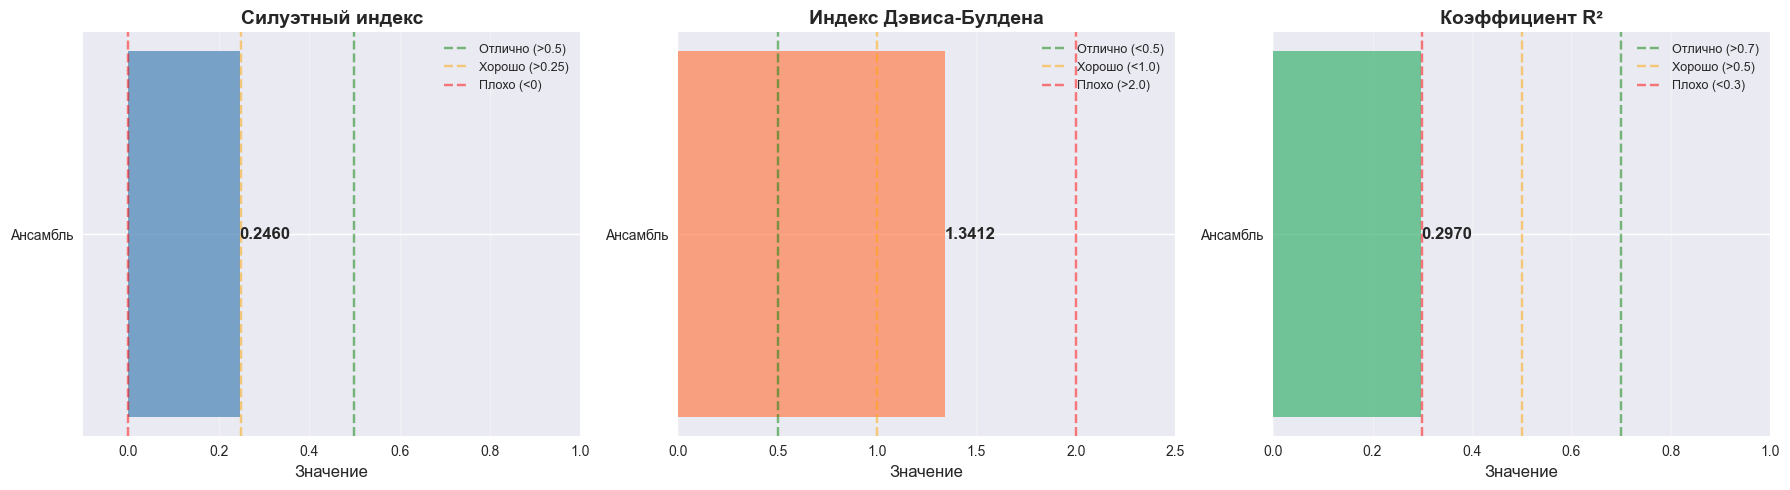

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].barh(['Ансамбль'], [silhouette], color='steelblue', alpha=0.7)
axes[0].axvline(x=0.5, color='green', linestyle='--', alpha=0.5, label='Отлично (>0.5)')
axes[0].axvline(x=0.25, color='orange', linestyle='--', alpha=0.5, label='Хорошо (>0.25)')
axes[0].axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Плохо (<0)')
axes[0].set_xlabel('Значение', fontsize=12)
axes[0].set_title('Силуэтный индекс', fontsize=14, fontweight='bold')
axes[0].set_xlim([-0.1, 1.0])
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].legend(fontsize=9)
axes[0].text(silhouette, 0, f'{silhouette:.4f}', ha='left', va='center', fontsize=12, fontweight='bold')

axes[1].barh(['Ансамбль'], [davies_bouldin], color='coral', alpha=0.7)
axes[1].axvline(x=0.5, color='green', linestyle='--', alpha=0.5, label='Отлично (<0.5)')
axes[1].axvline(x=1.0, color='orange', linestyle='--', alpha=0.5, label='Хорошо (<1.0)')
axes[1].axvline(x=2.0, color='red', linestyle='--', alpha=0.5, label='Плохо (>2.0)')
axes[1].set_xlabel('Значение', fontsize=12)
axes[1].set_title('Индекс Дэвиса-Булдена', fontsize=14, fontweight='bold')
axes[1].set_xlim([0, max(2.5, davies_bouldin * 1.2)])
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].legend(fontsize=9)
axes[1].text(davies_bouldin, 0, f'{davies_bouldin:.4f}', ha='left', va='center', fontsize=12, fontweight='bold')

axes[2].barh(['Ансамбль'], [r2_score], color='mediumseagreen', alpha=0.7)
axes[2].axvline(x=0.7, color='green', linestyle='--', alpha=0.5, label='Отлично (>0.7)')
axes[2].axvline(x=0.5, color='orange', linestyle='--', alpha=0.5, label='Хорошо (>0.5)')
axes[2].axvline(x=0.3, color='red', linestyle='--', alpha=0.5, label='Плохо (<0.3)')
axes[2].set_xlabel('Значение', fontsize=12)
axes[2].set_title('Коэффициент R²', fontsize=14, fontweight='bold')
axes[2].set_xlim([0, 1.0])
axes[2].grid(True, alpha=0.3, axis='x')
axes[2].legend(fontsize=9)
axes[2].text(r2_score, 0, f'{r2_score:.4f}', ha='left', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()